In [7]:
import pandas as pd

df = pd.read_csv('C:/Users/PC/Desktop/Cursos TI/aprendizado banco de dados/Case Video Games Sales/archive/vgsales.csv')

print(df.head(15))

    Rank                         Name Platform    Year         Genre  \
0      1                   Wii Sports      Wii  2006.0        Sports   
1      2            Super Mario Bros.      NES  1985.0      Platform   
2      3               Mario Kart Wii      Wii  2008.0        Racing   
3      4            Wii Sports Resort      Wii  2009.0        Sports   
4      5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
5      6                       Tetris       GB  1989.0        Puzzle   
6      7        New Super Mario Bros.       DS  2006.0      Platform   
7      8                     Wii Play      Wii  2006.0          Misc   
8      9    New Super Mario Bros. Wii      Wii  2009.0      Platform   
9     10                    Duck Hunt      NES  1984.0       Shooter   
10    11                   Nintendogs       DS  2005.0    Simulation   
11    12                Mario Kart DS       DS  2005.0        Racing   
12    13  Pokemon Gold/Pokemon Silver       GB  1999.0  Role-Pla

In [18]:
df.info()

#1. verificar os pontos e alfanumericos na coluna Name
#2. colocar classe fechada na coluna Genre e Publisher
#3. completar os dados faltantes com o valor na coluna Year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
# Verificando valores duplicados
df.duplicated().sum()

# Verificando valores nulos
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
# Visualizando os dados nulos
raw_null = df[df.isnull().any(axis=1)]
print("Linhas com valores nulos:\n", raw_null)

Linhas com valores nulos:
         Rank                                               Name Platform  \
470      471                         wwe Smackdown vs. Raw 2006      PS2   
1303    1305                                     Triple Play 99       PS   
1662    1664       Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA   
2222    2224                                 Bentley's Hackpack      GBA   
3159    3161  Nicktoons Collection: Game Boy Advance Video V...      GBA   
3166    3168  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
3766    3768  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
4145    4147                                 Sonic the Hedgehog      PS3   
4526    4528  The Fairly Odd Parents: Game Boy Advance Video...      GBA   
4635    4637  The Fairly Odd Parents: Game Boy Advance Video...      GBA   
5302    5304      Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)      Wii   
5647    5649  Cartoon Network Collection: Game Boy Advance V.

In [ ]:
# Visualizando a moda
df['Publisher'].mode()[0]

'Electronic Arts'

In [ ]:
# Trocando valores nulos pela moda
moda = df['Publisher'].mode()[0]
df['Publisher'].fillna(moda, inplace=True)

In [ ]:
# Verificando valores faltantes e substituindo pela media
df['Year'] = df['Year'].fillna(df['Year'].median())

# Convertendo a coluna Year em tipo int
df['Year'] = df['Year'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


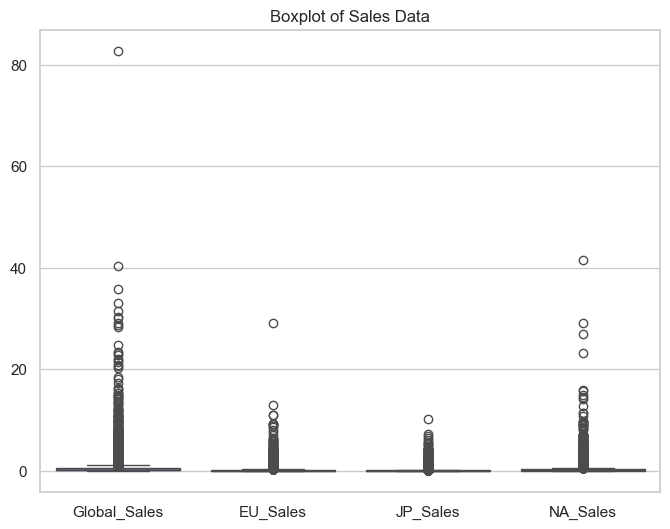

In [37]:
# Identificando outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Global_Sales', 'EU_Sales', 'JP_Sales', 'NA_Sales']])
plt.title('Boxplot of Sales Data')
plt.show()

<Figure size 1000x700 with 0 Axes>

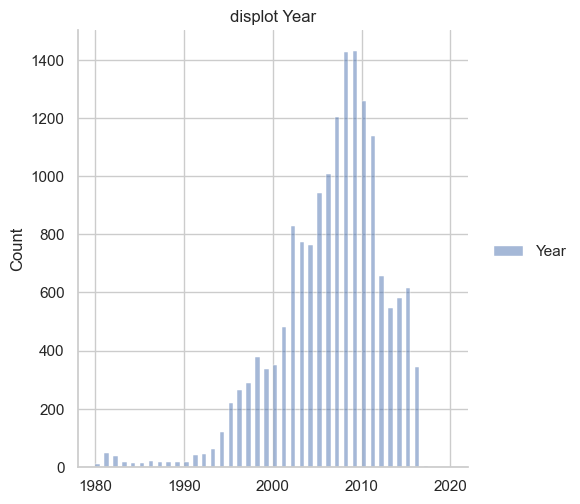

In [35]:
# Identificando outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.displot(data=df[['Year']], binwidth=0.5)
plt.title('displot Year')
plt.show()

In [ ]:
# Visualizando outliner na tabela Year
top_20 = df[['Name', 'Global_Sales', 'Year', 'JP_Sales', 'NA_Sales', 'EU_Sales']].nlargest(20, 'Global_Sales')
print(top_20)

# A DISCREPANCIA NÃO É GRANDE, PORÉM O VALOR ESTA CORRETO COM BASE NAS VENDAS POR REGIÃO

                                            Name  Global_Sales    Year  \
0                                     Wii Sports         82.74  2006.0   
1                              Super Mario Bros.         40.24  1985.0   
2                                 Mario Kart Wii         35.82  2008.0   
3                              Wii Sports Resort         33.00  2009.0   
4                       Pokemon Red/Pokemon Blue         31.37  1996.0   
5                                         Tetris         30.26  1989.0   
6                          New Super Mario Bros.         30.01  2006.0   
7                                       Wii Play         29.02  2006.0   
8                      New Super Mario Bros. Wii         28.62  2009.0   
9                                      Duck Hunt         28.31  1984.0   
10                                    Nintendogs         24.76  2005.0   
11                                 Mario Kart DS         23.42  2005.0   
12                   Pokemon Gold/Poke